In [22]:
import pandas as pd
import numpy as np

In [23]:
trading_prices = pd.read_csv('data/Gro_handelspreise_2018_2023_hour.csv', sep=';')

In [24]:
trading_prices = trading_prices[['Date', 'Start', 'End', 'Deutschland/Luxemburg [€/MWh] Original resolutions']]

In [25]:
trading_prices.columns = ['Date', 'Start Time', 'End Time', 'Price']
trading_prices['Date'] = pd.to_datetime(trading_prices['Date'], format='%d.%m.%Y')
trading_prices = trading_prices[trading_prices['Price'] != '-']

In [26]:
trading_prices['Price'] = trading_prices['Price'].str.replace(',', '.').astype(float)
trading_prices = trading_prices.set_index('Date')

In [27]:
trading_prices['Hour'] = trading_prices['Start Time'].str[:2].astype(int)
trading_prices['DayOfWeek'] = trading_prices.index.dayofweek
trading_prices['Month'] = trading_prices.index.month


In [28]:
trading_prices

,Start Time,End Time,Price,Hour,DayOfWeek,Month
Date,,,,,,
2018-10-01,00:00,01:00,59.53,0,0,10
2018-10-01,01:00,02:00,56.10,1,0,10
2018-10-01,02:00,03:00,51.41,2,0,10
2018-10-01,03:00,04:00,47.38,3,0,10
2018-10-01,04:00,05:00,47.59,4,0,10
...,...,...,...,...,...,...
2023-03-17,19:00,20:00,134.23,19,4,3
2023-03-17,20:00,21:00,126.35,20,4,3
2023-03-17,21:00,22:00,109.97,21,4,3


In [29]:
train_data = trading_prices[:int(len(trading_prices)*0.8)]
test_data = trading_prices[int(len(trading_prices)*0.8):]


In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(train_data['Price'], order=(1, 2, 1))
model_fit = model.fit()

/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [34]:
forecast = model_fit.forecast(steps=len(test_data))

/Library/Python/3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [39]:
forecast

31277    205.597989
31278    206.269605
31279    206.585698
31280    206.736862
31281    206.811515
            ...    
39092    272.836177
39093    272.844622
39094    272.853068
39095    272.861513
39096    272.869958
Name: predicted_mean, Length: 7820, dtype: float64

In [35]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_data['Price'], forecast)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 126.35572038804061


In [42]:
import matplotlib.pyplot as plt

# Combine actual prices and predictions into a single DataFrame
actual_prices = test_data['Price']
predictions = pd.Series(forecast, index=test_data.index, name='Predictions')
combined_data = pd.concat([actual_prices, predictions], axis=1)

predictions

Date
2022-04-26   NaN
2022-04-26   NaN
2022-04-26   NaN
2022-04-26   NaN
2022-04-26   NaN
              ..
2023-03-17   NaN
2023-03-17   NaN
2023-03-17   NaN
2023-03-17   NaN
2023-03-17   NaN
Name: Predictions, Length: 7820, dtype: float64

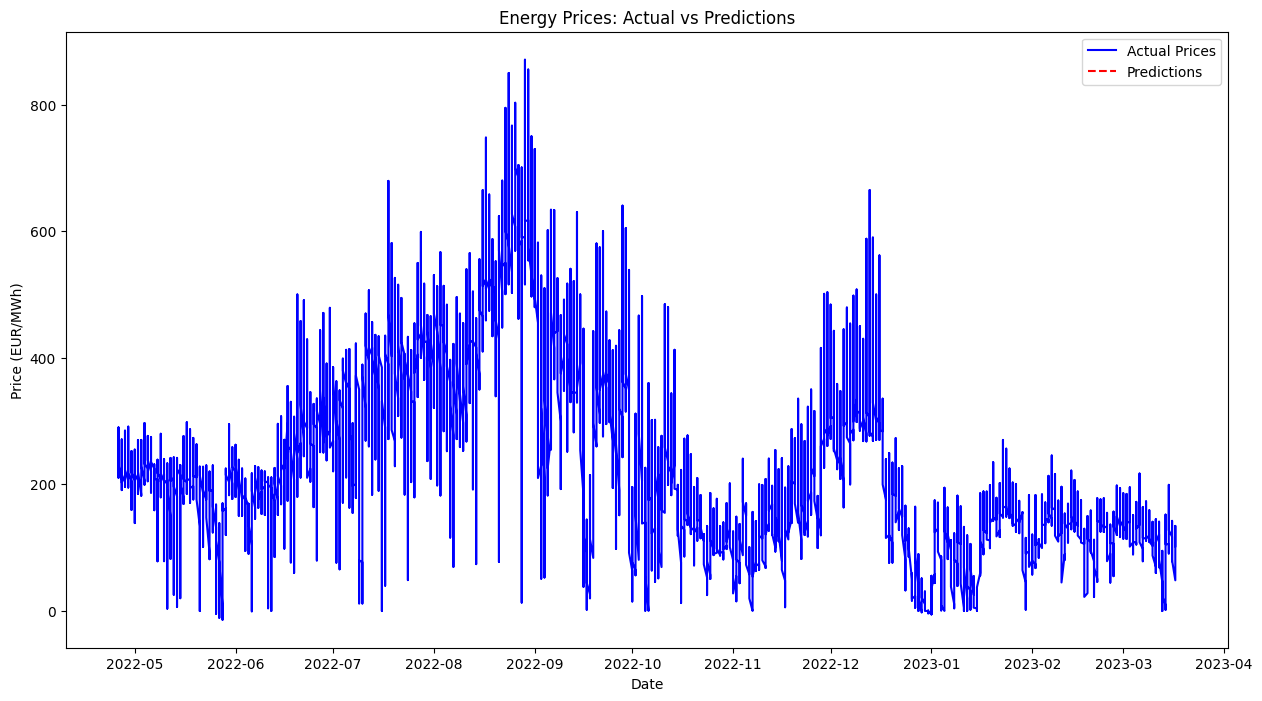

In [38]:

# Plot actual prices and predictions
plt.figure(figsize=(15, 8))
plt.plot(combined_data['Price'], label='Actual Prices', color='blue')
plt.plot(combined_data['Predictions'], label='Predictions', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.title('Energy Prices: Actual vs Predictions')
plt.legend()
plt.show()